<a href="https://colab.research.google.com/github/Ragulan1525/Python-Chatbot-for-HotelnManagement/blob/main/Crop_Production_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Create synthetic dataset
np.random.seed(42)
years = np.arange(2000, 2021)
states = ['rajasthan', 'tamil nadu', 'bihar']
crops = ['Wheat', 'Rice', 'Corn']

data = {
    'Year': np.random.choice(years, 300),
    'State': np.random.choice(states, 300),
    'Crop': np.random.choice(crops, 300),
    'Area_Harvested': np.random.uniform(100, 1000, 300).round(2),
    'Production': np.random.uniform(200, 5000, 300).round(2),
    'Rainfall': np.random.uniform(50, 300, 300).round(2),
    'Temperature': np.random.uniform(15, 35, 300).round(2)
}
df = pd.DataFrame(data)
df['Yield'] = (df['Production'] / df['Area_Harvested']).round(2)

print("Synthetic dataset created.")
df.to_csv('/content/crop_production_synthetic.csv', index=False)
df.head()


Synthetic dataset created.


,Year,State,Crop,Area_Harvested,Production,Rainfall,Temperature,Yield
0,2006,rajasthan,Wheat,880.49,3517.86,228.73,31.46,4.00
1,2019,tamil nadu,Wheat,418.73,3479.28,190.69,25.45,8.31
2,2014,bihar,Rice,457.45,4148.40,167.88,17.46,9.07
3,2010,rajasthan,Wheat,194.38,2742.38,185.81,32.19,14.11
4,2007,rajasthan,Corn,763.66,4112.26,89.81,31.00,5.38


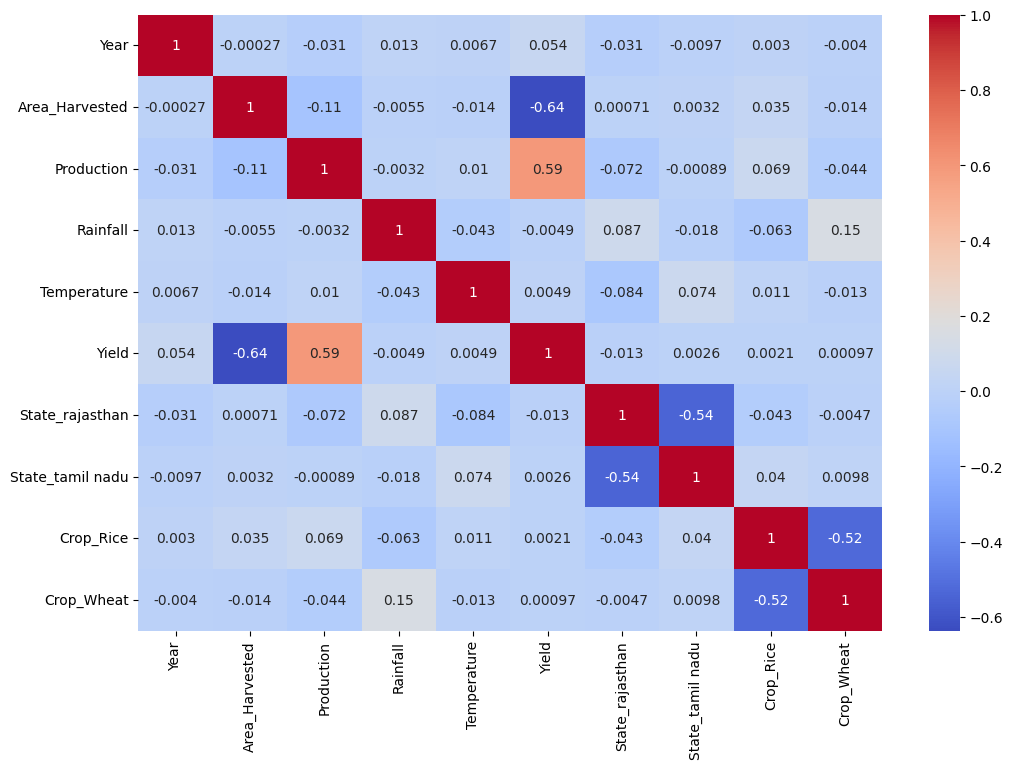

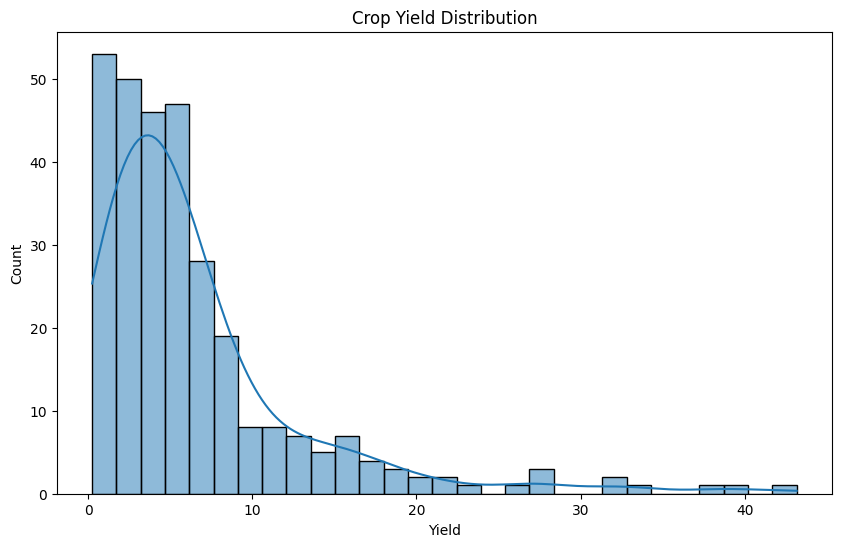

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
df = pd.read_csv('/content/crop_production_synthetic.csv')

# Data Preprocessing
# Handle missing values (if any)
df = df.dropna()

# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

# Exploratory Data Analysis (EDA)
# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Visualize crop yield distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], kde=True)
plt.title('Crop Yield Distribution')
plt.show()


Mean Squared Error: 47.66120548828086


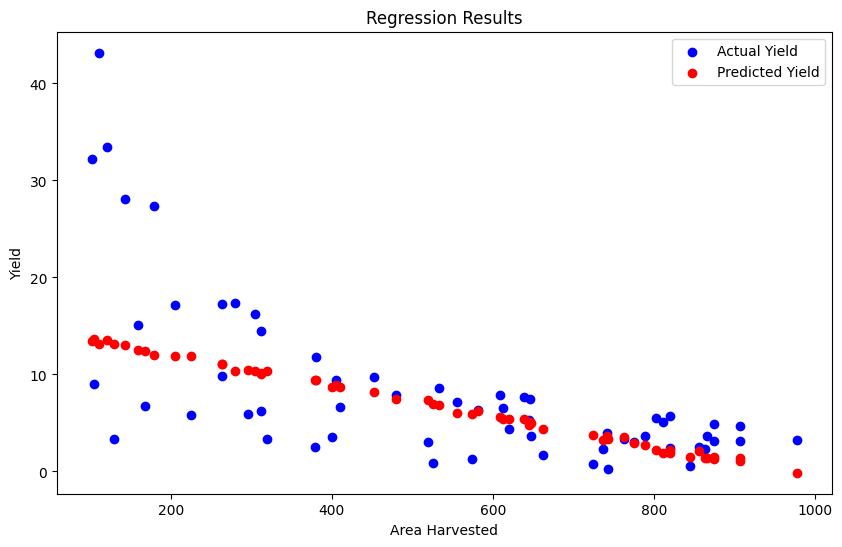

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target variable
X = df[['Area_Harvested', 'Rainfall', 'Temperature']]
y = df['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Area_Harvested'], y_test, color='blue', label='Actual Yield')
plt.scatter(X_test['Area_Harvested'], y_pred, color='red', label='Predicted Yield')
plt.title('Regression Results')
plt.xlabel('Area Harvested')
plt.ylabel('Yield')
plt.legend()
plt.show()
